# कोविड-19 संशोधन पत्रांचे विश्लेषण

या आव्हानात, आपण कोविड महामारीच्या विषयावर पुढे जाऊ आणि या विषयावरील वैज्ञानिक संशोधन पत्रांवर प्रक्रिया करण्यावर लक्ष केंद्रित करू. [CORD-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) मध्ये 7000 हून अधिक (लेखनाच्या वेळी) कोविडवरील संशोधन पत्रे उपलब्ध आहेत, ज्यामध्ये मेटाडेटा आणि सारांश दिलेले आहेत (आणि त्यापैकी सुमारे निम्म्या पत्रांसाठी पूर्ण मजकूर देखील उपलब्ध आहे).

[Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) या कॉग्निटिव्ह सेवेचा वापर करून या डेटासेटचे विश्लेषण कसे करावे याचे संपूर्ण उदाहरण [या ब्लॉग पोस्टमध्ये](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) दिले आहे. आपण या विश्लेषणाचा सुलभ केलेला आवृत्तीवर चर्चा करू.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## डेटा मिळवणे

सर्वप्रथम, आपण ज्या CORD पेपर्ससह काम करणार आहोत त्यांचे मेटाडेटा मिळवणे आवश्यक आहे.

**टीप**: या रिपॉझिटरीचा भाग म्हणून आम्ही डेटासेटची प्रत उपलब्ध करून देत नाही. तुम्हाला प्रथम [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) फाईल [Kaggle वरील या डेटासेटमधून](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) डाउनलोड करावी लागेल. यासाठी Kaggle वर नोंदणी आवश्यक असू शकते. तुम्ही नोंदणी न करता देखील [येथून](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html) डेटासेट डाउनलोड करू शकता, परंतु त्यामध्ये मेटाडेटा फाईलसह सर्व पूर्ण मजकूर समाविष्ट असेल.

आम्ही डेटा थेट ऑनलाइन स्रोतावरून मिळवण्याचा प्रयत्न करू, परंतु जर ते अयशस्वी झाले, तर तुम्हाला वरीलप्रमाणे डेटा डाउनलोड करावा लागेल. तसेच, जर तुम्ही यावर अधिक प्रयोग करण्याचा विचार करत असाल, तर प्रतीक्षा वेळ वाचवण्यासाठी डेटा डाउनलोड करणे उपयुक्त ठरेल.

> **टीप** की डेटासेट खूप मोठा आहे, सुमारे 1 Gb आकाराचा, आणि खालील कोडची ओळ पूर्ण होण्यासाठी खूप वेळ लागू शकतो! (~5 मिनिटे)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

आता आपण प्रकाशन दिनांक स्तंभ `datetime` मध्ये रूपांतरित करू आणि प्रकाशन दिनांकांची श्रेणी पाहण्यासाठी हिस्टोग्राम प्लॉट करू.


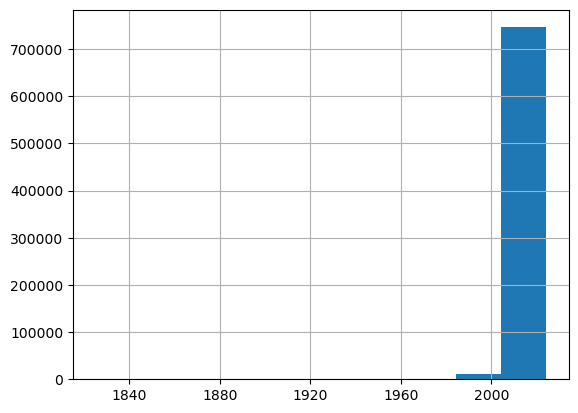

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## संरचित डेटा निष्कर्षण

चला पाहूया की आपण संक्षेपांमधून कोणती माहिती सहजपणे काढू शकतो. आपल्याला ज्यामध्ये रस असू शकतो त्यापैकी एक म्हणजे कोणत्या उपचार पद्धती अस्तित्वात आहेत आणि त्या कालांतराने कशा विकसित झाल्या आहेत हे पाहणे. सुरुवातीला, आपण COVID च्या उपचारासाठी वापरल्या जाणाऱ्या संभाव्य औषधांची यादी आणि निदानांची यादी मॅन्युअली तयार करू शकतो. त्यानंतर, आपण त्या यादीतील संज्ञा शोधून कागदांच्या संक्षेपांमध्ये त्यांचा शोध घेऊ शकतो.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


आम्ही आमच्या डेटा फ्रेममध्ये अनेक स्तंभ जोडले आहेत ज्यामध्ये एखाद्या औषध/निदानाचा उल्लेख किती वेळा सारांशात आहे हे दर्शवले आहे.

> **टीप** की आम्ही उपस्ट्रिंग शोधताना शब्दाच्या सुरुवातीला जागा जोडतो. जर आम्ही असे केले नाही, तर आपल्याला चुकीचे परिणाम मिळू शकतात, कारण *chloroquine* देखील *hydroxychloroquine* या उपस्ट्रिंगमध्ये सापडेल. तसेच, आम्ही `str` मध्ये सारांश स्तंभाचे रूपांतर करण्यास भाग पाडतो जेणेकरून त्रुटी दूर होईल - `str` काढून टाकून काय होते ते पाहा.

डेटासह काम करणे सोपे करण्यासाठी, आपण फक्त औषधांच्या मोजणीसह उप-फ्रेम काढू शकतो आणि एकत्रित उपस्थितीची संख्या मोजू शकतो. यामुळे आपल्याला सर्वात लोकप्रिय औषध मिळते:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

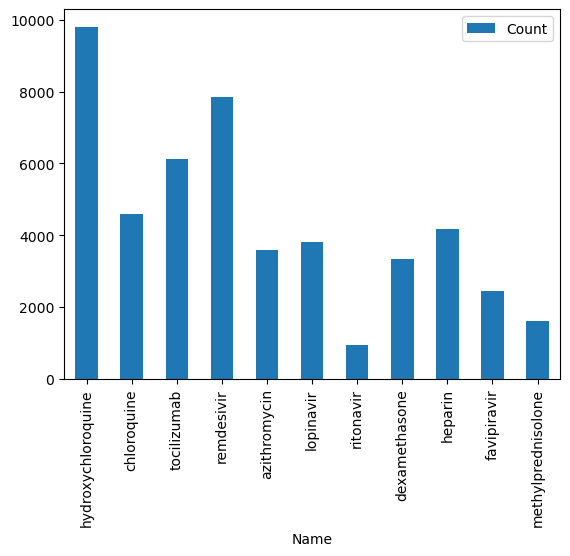

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## उपचार धोरणातील प्रवृत्ती शोधणे

वरील उदाहरणात आपण सर्व मूल्यांचे `sum` केले आहे, परंतु आपण हेच मासिक पातळीवर देखील करू शकतो:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

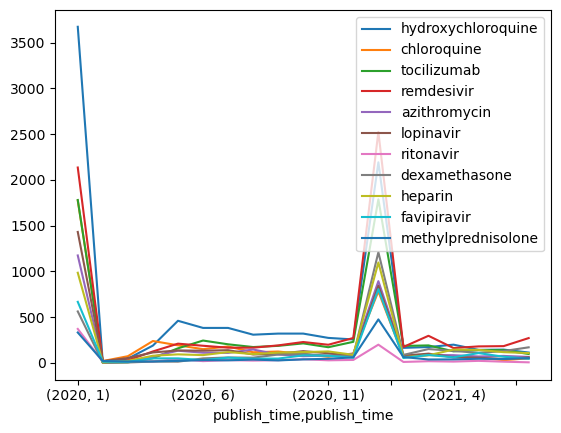

In [152]:
dfmt.plot()
plt.show()

एक मनोरंजक निरीक्षण म्हणजे आपल्याला दोन ठिकाणी मोठ्या प्रमाणात वाढ दिसून येते: जानेवारी 2020 आणि जानेवारी 2021. याचे कारण असे आहे की काही कागदपत्रांमध्ये प्रकाशनाची तारीख स्पष्टपणे नमूद केलेली नसते, आणि ती संबंधित वर्षाच्या जानेवारी महिन्यात नमूद केली जाते.

डेटाचा अधिक चांगल्या प्रकारे अर्थ लावण्यासाठी, चला फक्त काही औषधांचे दृश्यांकन करूया. तसेच, आपण जानेवारीसाठीचा डेटा "मिटवू" आणि त्याऐवजी काही मध्यम मूल्य भरू, जेणेकरून अधिक आकर्षक आलेख तयार होईल:


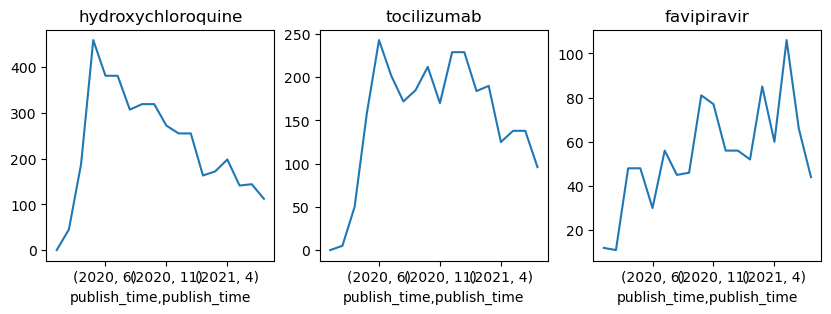

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

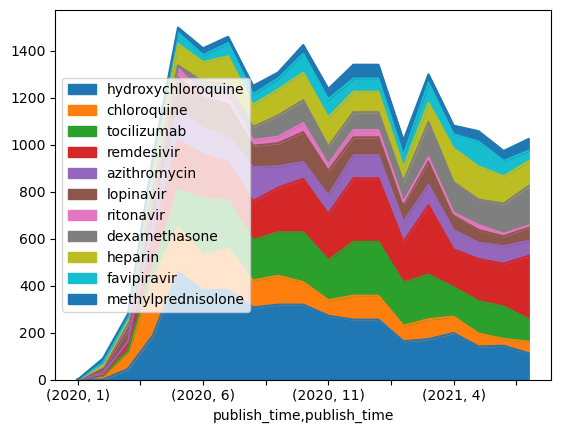

In [154]:
dfmt.plot.area()
plt.show()

याव्यतिरिक्त, आपण टक्केवारीत सापेक्ष लोकप्रियता मोजू शकतो:


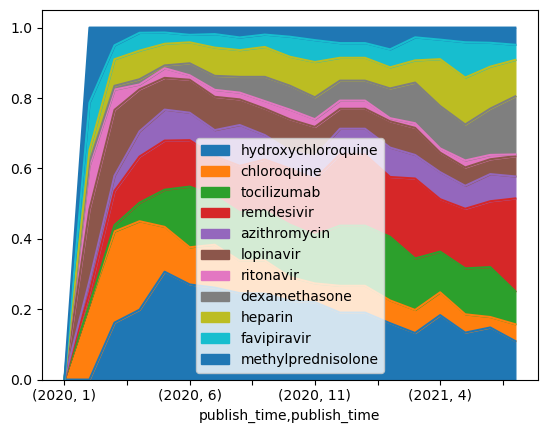

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## औषध-निदान पत्रव्यवहाराची गणना

आपण शोधू शकणाऱ्या सर्वात मनोरंजक नात्यांपैकी एक म्हणजे वेगवेगळ्या निदानांसाठी वेगवेगळी औषधे कशी वापरली जातात. याचे दृश्य रूप तयार करण्यासाठी, आपल्याला **सह-घटनेचा वारंवारता नकाशा** तयार करावा लागेल, जो दर्शवेल की दोन संज्ञा एका कागदात किती वेळा एकत्र उल्लेखित केल्या आहेत.

असा नकाशा मूलत: एक 2D मॅट्रिक्स आहे, जो **numpy array** च्या स्वरूपात उत्तम प्रकारे सादर केला जातो. आपण सर्व सारांशांमधून जाऊन, तेथे आढळणाऱ्या घटकांची नोंद करून हा नकाशा तयार करू:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

या मॅट्रिक्सचे दृश्यात्मक रूप दाखवण्याच्या मार्गांपैकी एक म्हणजे **हीटमॅप** काढणे:


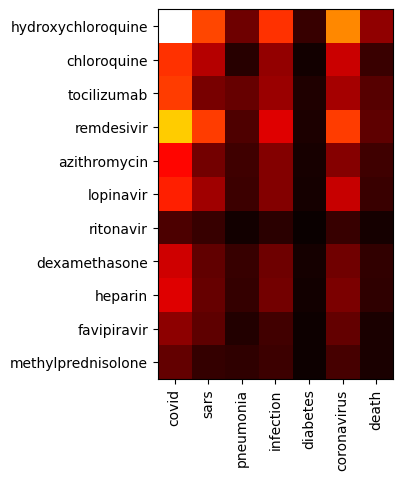

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

तथापि, **Sankey** आकृतीचा वापर करून आणखी चांगले दृश्यांकन करता येऊ शकते! `matplotlib` मध्ये या प्रकारच्या आकृतीसाठी अंगभूत समर्थन नाही, त्यामुळे आपल्याला [Plotly](https://plotly.com/python/) वापरावे लागेल, जसे की [या ट्युटोरियलमध्ये](https://plotly.com/python/sankey-diagram/) वर्णन केले आहे.

Plotly Sankey आकृती तयार करण्यासाठी, आपल्याला खालील यादी तयार कराव्या लागतील:
* ग्राफमधील सर्व नोड्सची `all_nodes` यादी, ज्यामध्ये औषधे आणि निदान दोन्ही समाविष्ट असतील
* स्रोत आणि लक्ष्य निर्देशांकांची यादी - या याद्या दाखवतील की कोणते नोड्स आकृतीच्या डाव्या बाजूला जातात आणि कोणते उजव्या बाजूला जातात
* सर्व दुव्यांची यादी, प्रत्येक दुव्यामध्ये समाविष्ट असेल:
   - `all_nodes` अॅरेमधील स्रोत निर्देशांक
   - लक्ष्य निर्देशांक
   - दुव्याची ताकद दर्शवणारे मूल्य. हेच मूल्य आपल्या सह-घटनेच्या मॅट्रिक्समधून घेतलेले आहे.
   - ऐच्छिकरित्या दुव्याचा रंग. स्पष्टतेसाठी काही अटी हायलाइट करण्याचा पर्याय आपण ठेवू शकतो

Sankey आकृती काढण्यासाठी सामान्य कोड स्वतंत्र `sankey` फंक्शन म्हणून संरचित केले आहे, जे दोन याद्या (स्रोत आणि लक्ष्य श्रेणी) आणि सह-घटनेचा मॅट्रिक्स घेतो. यामध्ये आपण थ्रेशोल्ड निर्दिष्ट करू शकतो आणि त्या थ्रेशोल्डपेक्षा कमी ताकद असलेले सर्व दुवे वगळू शकतो - यामुळे आकृती थोडी कमी गुंतागुंतीची होते.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## निष्कर्ष

तुम्ही पाहिले की, टेक्स्टसारख्या असंरचित डेटा स्रोतांमधून माहिती काढण्यासाठी आपण अगदी सोप्या पद्धती वापरू शकतो. या उदाहरणात, आपण औषधांची विद्यमान यादी घेतली आहे, परंतु नैसर्गिक भाषा प्रक्रिया (NLP) तंत्रांचा वापर करून टेक्स्टमधून घटक काढणे हे अधिक प्रभावी ठरेल. [या ब्लॉग पोस्टमध्ये](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) आम्ही घटक काढण्यासाठी क्लाउड सेवांचा कसा वापर करायचा हे वर्णन केले आहे. आणखी एक पर्याय म्हणजे Python NLP लायब्ररी जसे की [NLTK](https://www.nltk.org/) वापरणे - NLTK चा वापर करून टेक्स्टमधून माहिती काढण्याची पद्धत [येथे](https://www.nltk.org/book/ch07.html) वर्णन केली आहे.


## आव्हान

COVID पेपर डेटा पुढील प्रकारे संशोधन करा:

1. वेगवेगळ्या औषधांची सह-अस्तित्व मॅट्रिक्स तयार करा आणि कोणती औषधे एकत्र येतात (उदा. एका सारांशात उल्लेख केलेली). औषधे आणि निदानांसाठी सह-अस्तित्व मॅट्रिक्स तयार करण्यासाठी कोड सुधारित करू शकता.
1. ही मॅट्रिक्स हीटमॅप वापरून व्हिज्युअलाइझ करा.
1. अतिरिक्त आव्हान म्हणून, औषधांच्या सह-अस्तित्वाचे व्हिज्युअलायझेशन [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram) वापरून करण्याचा प्रयत्न करा. [ही लायब्ररी](https://pypi.org/project/chord/) तुम्हाला chord diagram तयार करण्यात मदत करू शकते.
1. आणखी एक आव्हान म्हणून, नियमित अभिव्यक्ती वापरून वेगवेगळ्या औषधांचे डोस (जसे **400mg** मध्ये *take 400mg of chloroquine daily*) काढण्याचा प्रयत्न करा आणि वेगवेगळ्या औषधांसाठी वेगवेगळे डोस दर्शवणारा dataframe तयार करा. **टीप**: औषधाच्या नावाच्या जवळील मजकूरात असलेल्या संख्यात्मक मूल्यांचा विचार करा.



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील मूळ दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवणाऱ्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
